<a href="https://colab.research.google.com/github/AISEN312/first-contributions/blob/main/fram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
crude_oil_futures_df = pd.read_csv('/content/DATA - Crude oil Future.csv')
icomdex_crudeoil_df = pd.read_csv('/content/DATA - iCOMDEX CRUDE OIL.csv')
icomdex_naturalgas_df = pd.read_csv('/content/DATA - iCOMDEX Natural Gas.csv')
naturalgas_futures_df = pd.read_csv('/content/DATA - Natural Gas Futures.csv')
CPI_df = pd.read_csv('/content/DATA - CPI _Fuel & Light.csv')
IV_df = pd.read_csv("/content/DATA - Implied Volatility.csv")


In [95]:
def convert_to_datetime_safe(df, column_name='Year'):
    """
    Converts a column to datetime, handling non-date values by skipping them.

    Args:
        df: The DataFrame.
        column_name: The name of the column to convert.

    Returns:
        The DataFrame with the converted column.
    """
    try:
        df[column_name] = pd.to_datetime(df[column_name], errors='raise')  # Try regular conversion first
    except ValueError:
        # If ValueError, try coercing errors to NaT (Not a Time) and warn the user
        try:
            df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
            print(f"Warning: Non-date values found in column '{column_name}' and replaced with NaT.")
        except Exception as e:
            print(f"Error converting column '{column_name}' to datetime: {e}")

    return df

# Apply the safe conversion function to each DataFrame
crude_oil_futures_df = convert_to_datetime_safe(crude_oil_futures_df)
icomdex_crudeoil_df = convert_to_datetime_safe(icomdex_crudeoil_df)
icomdex_naturalgas_df = convert_to_datetime_safe(icomdex_naturalgas_df)
naturalgas_futures_df = convert_to_datetime_safe(naturalgas_futures_df)
CPI_df = convert_to_datetime_safe(CPI_df)
IV_df = convert_to_datetime_safe(IV_df, column_name='Date')  # For IV_df, use 'Date' column


<ipython-input-95-cac159bd3c59>:13: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[column_name] = pd.to_datetime(df[column_name], errors='raise')  # Try regular conversion first
<ipython-input-95-cac159bd3c59>:17: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[column_name] = pd.to_datetime(df[column_name], errors='coerce')


In [102]:
crude_oil_futures_df.set_index('Date', inplace=True)
icomdex_crudeoil_df.set_index('Date', inplace=True)
icomdex_naturalgas_df.set_index('Date', inplace=True)
naturalgas_futures_df.set_index('Date', inplace=True)
CPI_df.set_index('Year', inplace=True)
IV_df.set_index('Date', inplace=True)

In [103]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

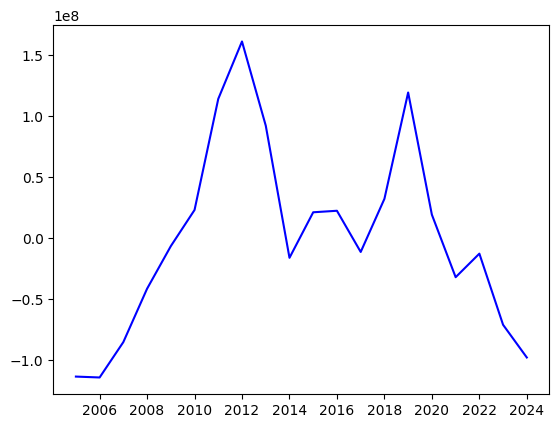

In [104]:
plt.plot(crude_oil_futures_df.index, crude_oil_futures_df['yi-mean'], label='Crude Oil Futures', color='blue')


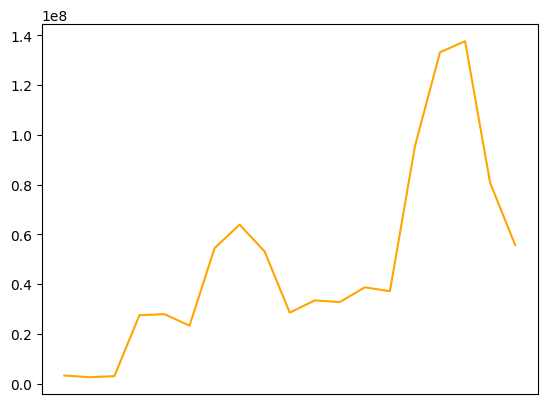

In [105]:
plt.plot(naturalgas_futures_df.index, naturalgas_futures_df['Futures(Natural Gas)'], label='Natural Gas Futures', color='orange')

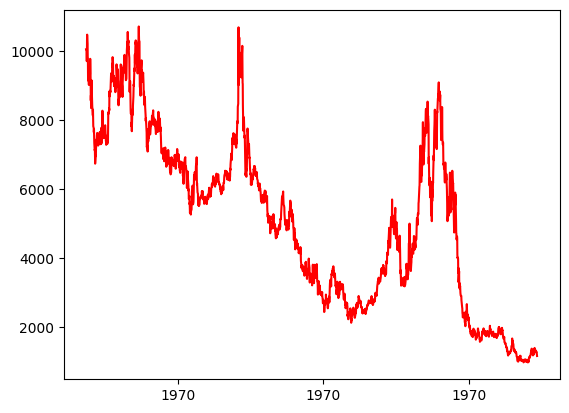

In [106]:
plt.plot(icomdex_naturalgas_df.index, icomdex_naturalgas_df['PRICE'], label='iCOMEDEX Natural Gas', color='red')

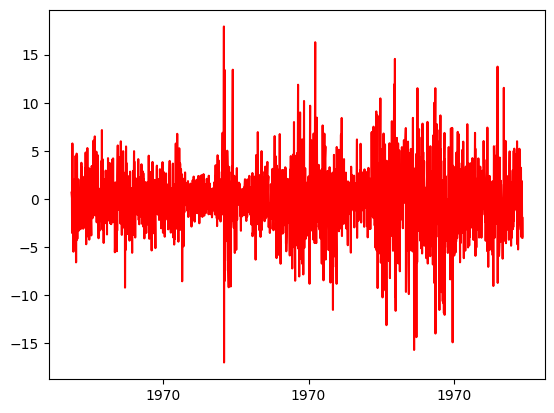

In [107]:
plt.plot(icomdex_naturalgas_df.index, icomdex_naturalgas_df['RETURN'], label='iCOMEDEX Natural Gas', color='red')

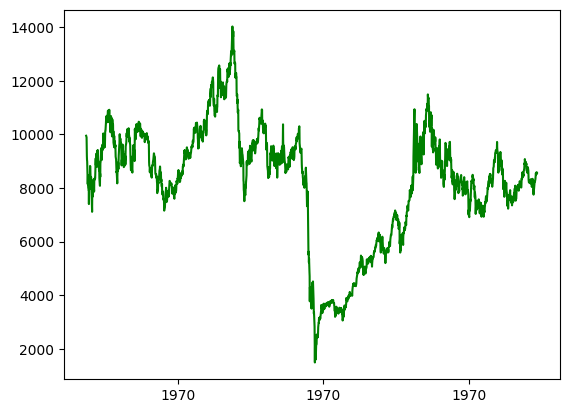

In [108]:
plt.plot(icomdex_crudeoil_df.index, icomdex_crudeoil_df['price'], label='iCOMDEX Crude Oil Index', color='green')


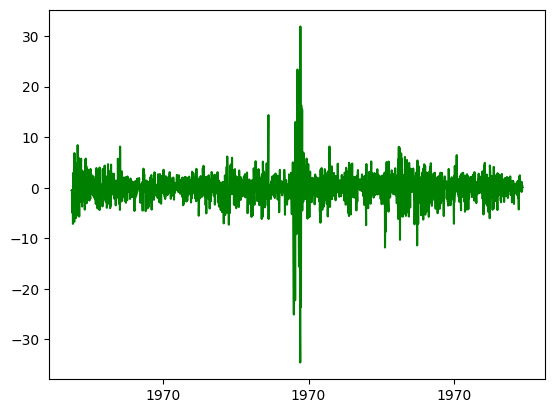

In [109]:
plt.plot(icomdex_crudeoil_df.index, icomdex_crudeoil_df['returns'], label='iCOMDEX Crude Oil Index', color='green')

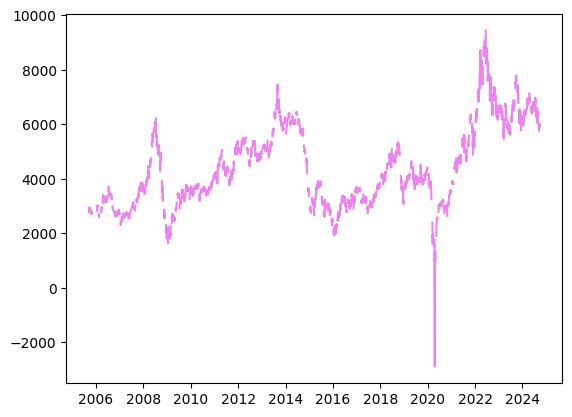

In [112]:
plt.plot(IV_df.index, IV_df['Last Price (Rs)'], label='Implied volatility', color='violet')

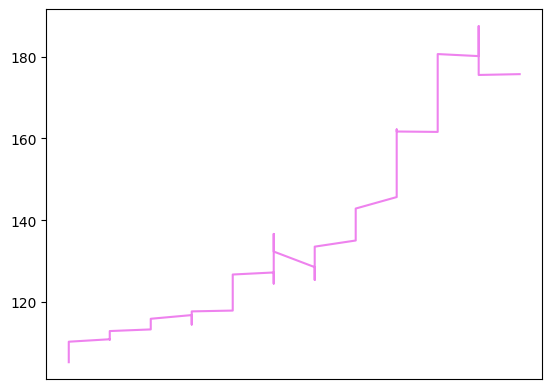

In [113]:
plt.plot(CPI_df.index, CPI_df['Combined CPI'], label='CPI_Fuel & Light', color='violet')